In [92]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
import hopsworks
import pandas as pd

In [94]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/197787
Connected. Call `.close()` to terminate connection gracefully.


In [95]:
wine_df = pd.read_csv('winequalityN.csv', )
wine_df.columns = [c.strip().replace(' ', '_') for c in wine_df.columns]
wine_df.type[wine_df.type == 'white'] = 1
wine_df.type[wine_df.type == 'red'] = 0
wine_df["type"] = pd.to_numeric(wine_df["type"])
wine_df = wine_df.dropna()


wine_df.head()

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed_acidity         6463 non-null   float64
 2   volatile_acidity      6463 non-null   float64
 3   citric_acid           6463 non-null   float64
 4   residual_sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free_sulfur_dioxide   6463 non-null   float64
 7   total_sulfur_dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [97]:
wine_df.describe()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [98]:
wine_df['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  Our Wine Data

Let's look at our wine - the distribution and range of values for the 11 different features
 * fixed_acidity
 * volatile_acidity
 * citric_acid
 * residual_sugar
 * chlorides
 * free_sulfur_dioxide
 * total_sulfur_dioxide
 * density
 * pH
 * sulphates
 * alcohol
 
 and the target variable is `quality`.

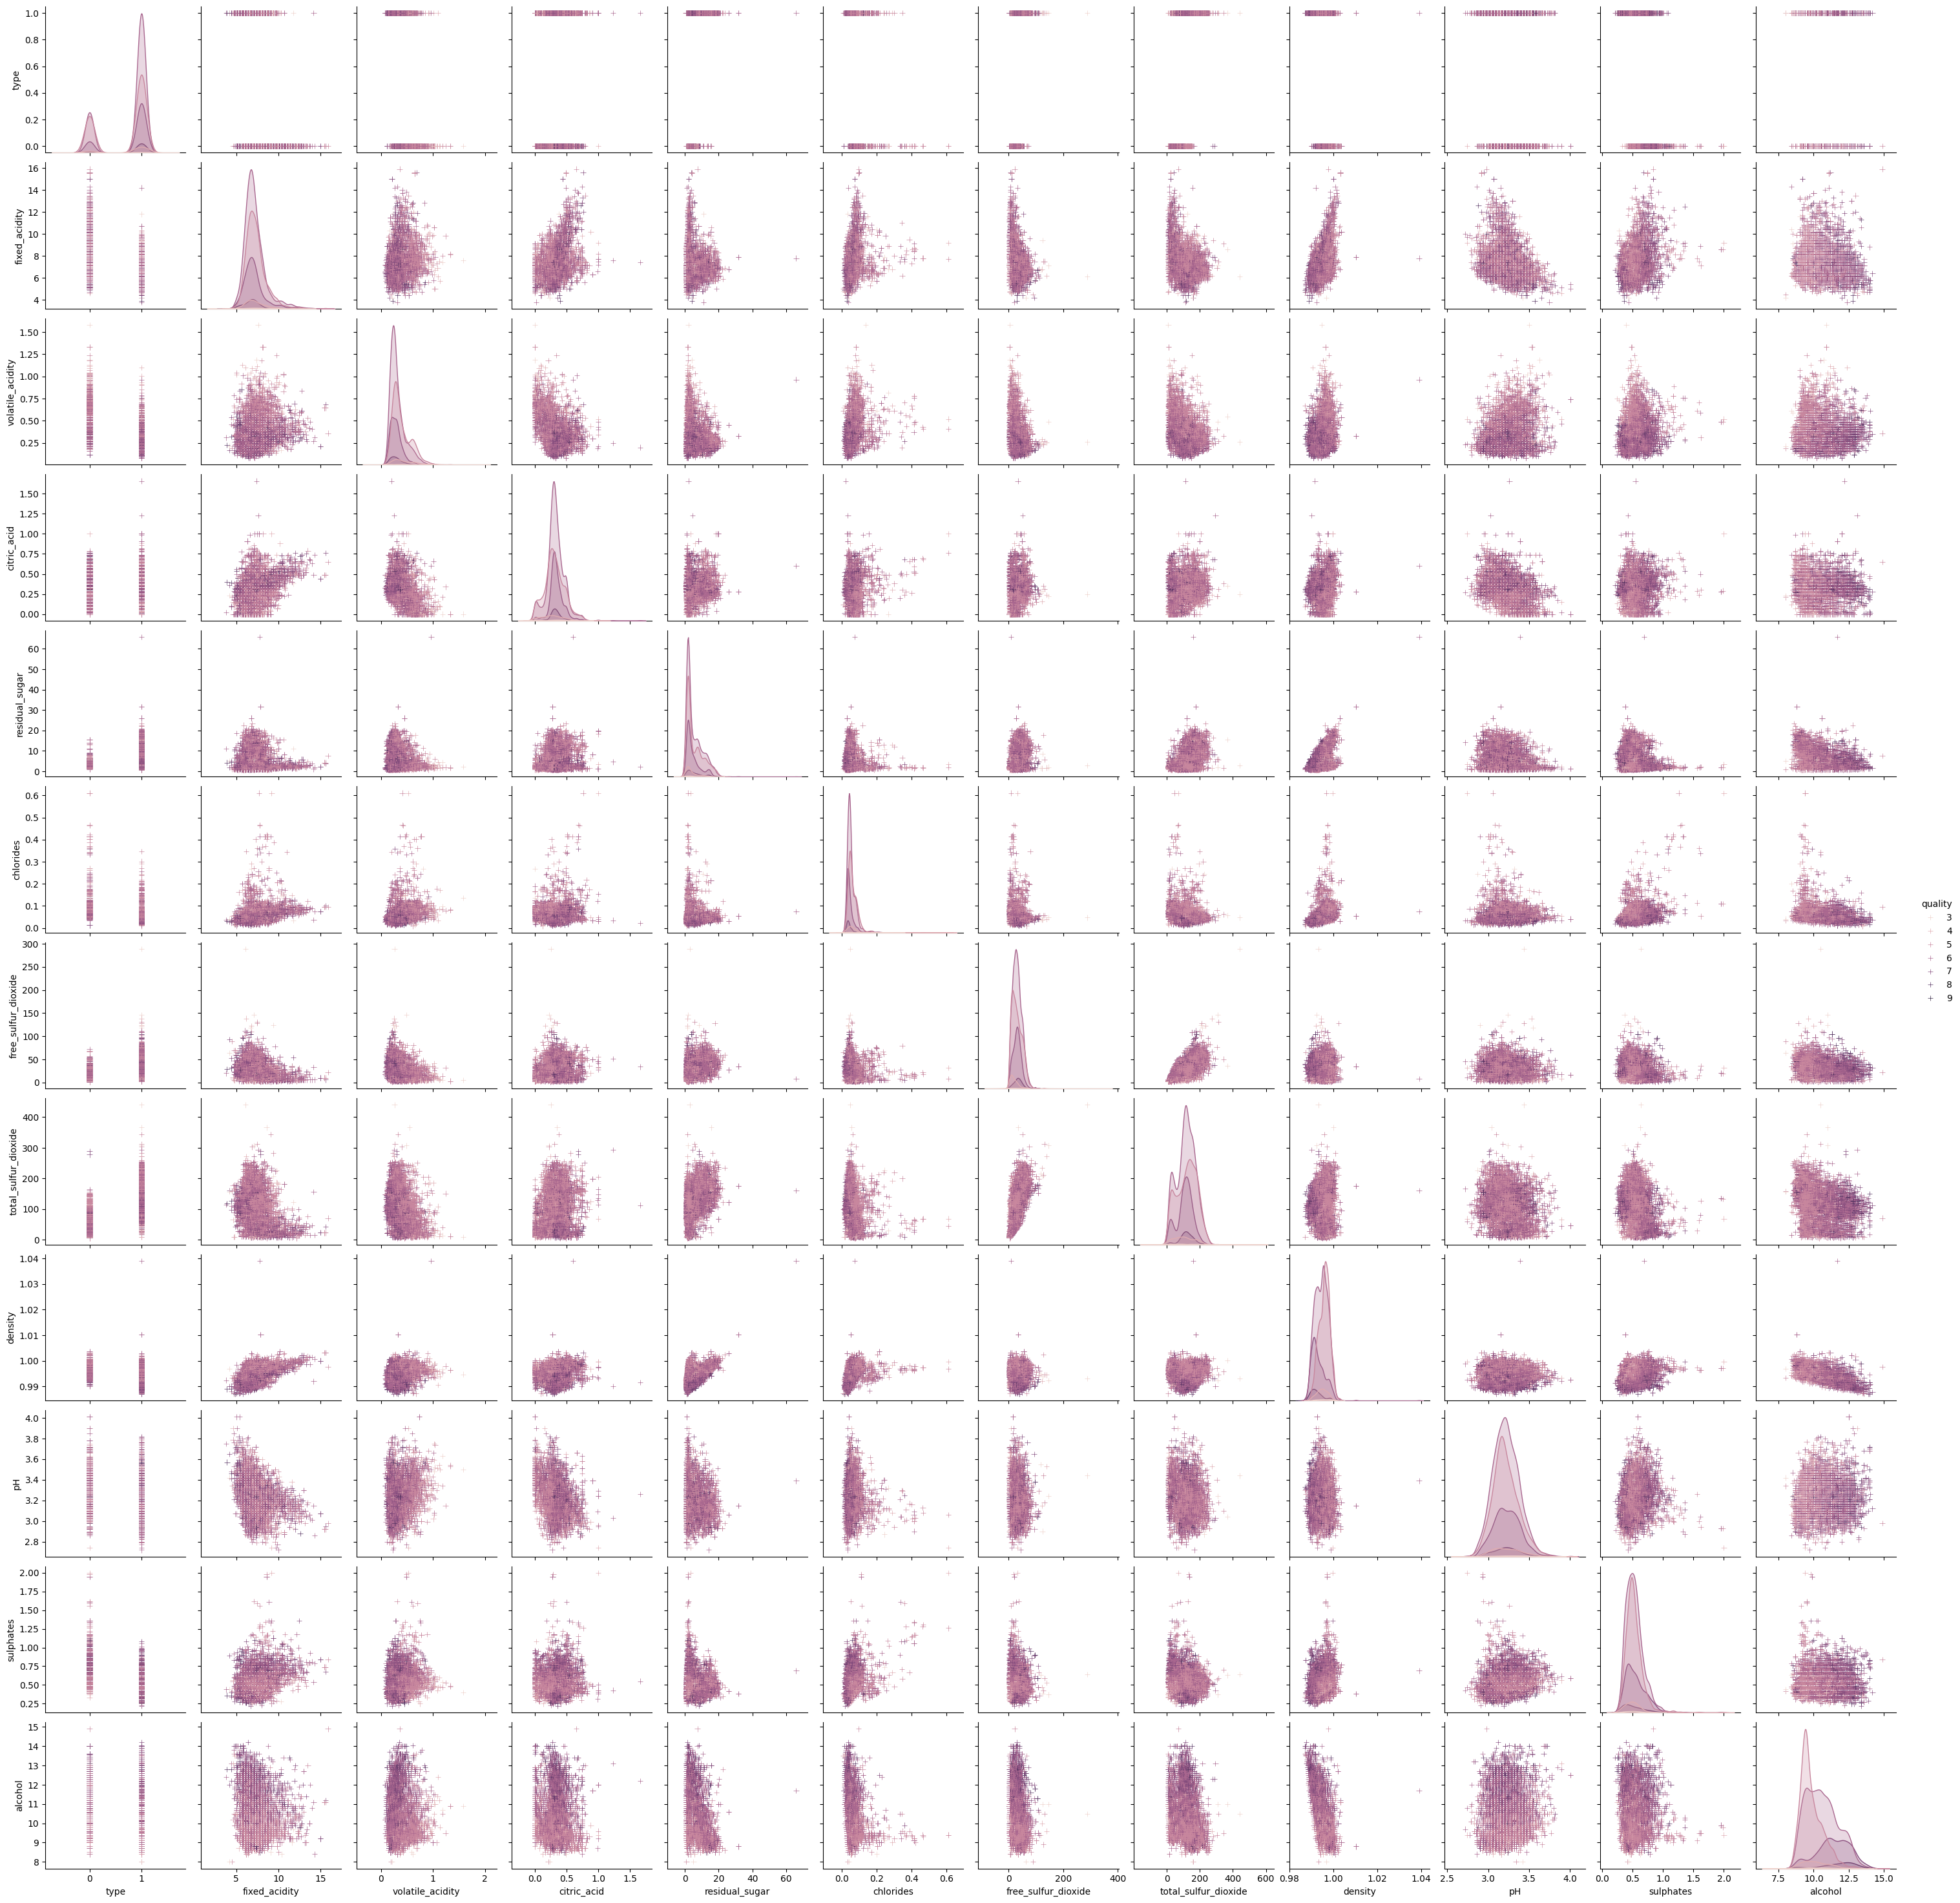

In [99]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 11 quality of wine (0-10).
To do this, we can visualize the range of values for the features for each of the 11 wine quality.

2023-11-13 23:24:11,118 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:11,132 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


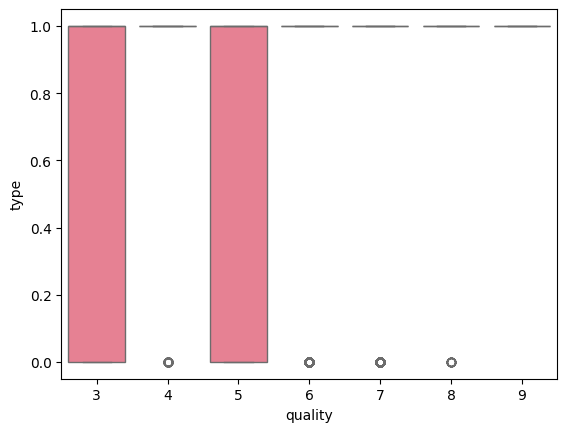

2023-11-13 23:24:11,291 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:11,299 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


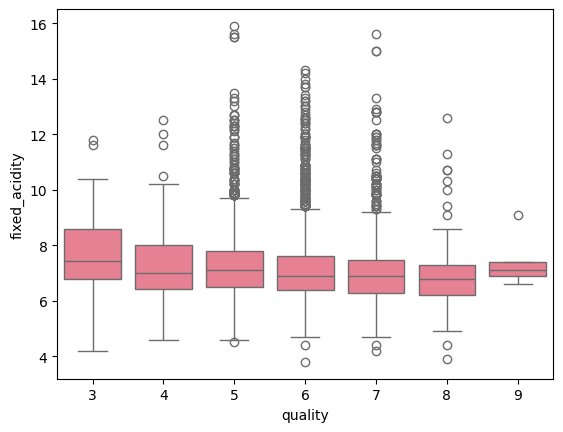

2023-11-13 23:24:11,458 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:11,467 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


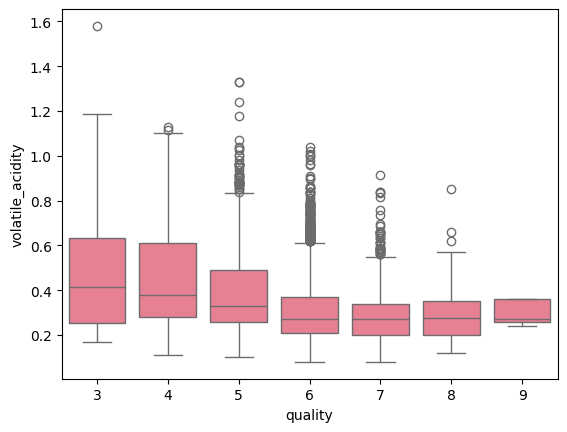

2023-11-13 23:24:11,625 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:11,634 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


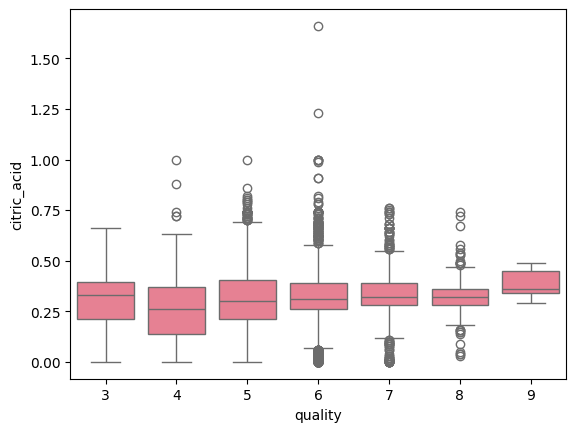

2023-11-13 23:24:11,791 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:11,800 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


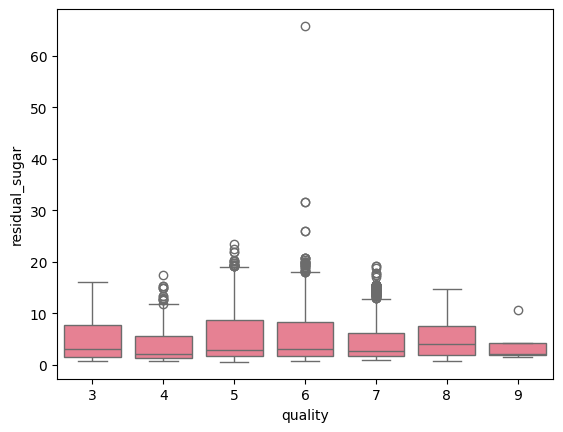

2023-11-13 23:24:11,955 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:11,964 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


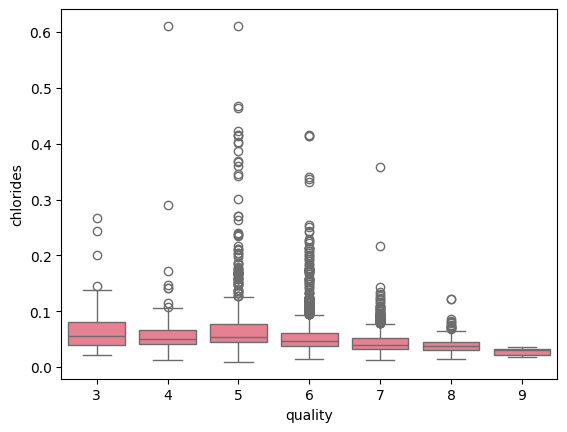

2023-11-13 23:24:12,119 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:12,128 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


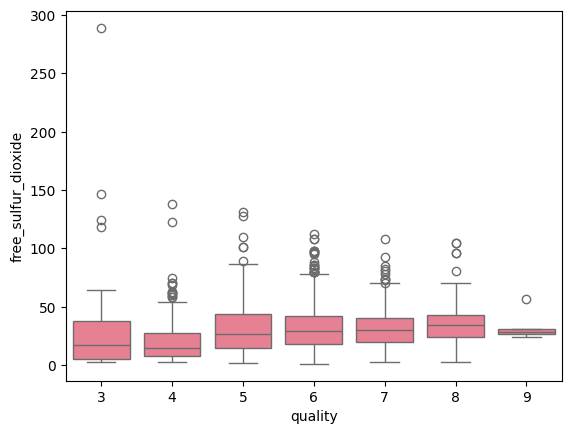

2023-11-13 23:24:12,285 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:12,294 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


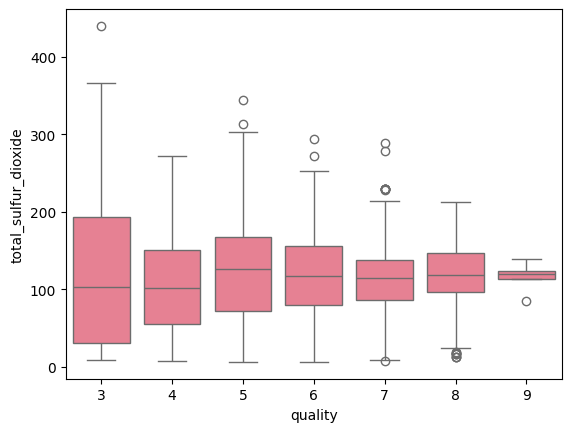

2023-11-13 23:24:12,447 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:12,467 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


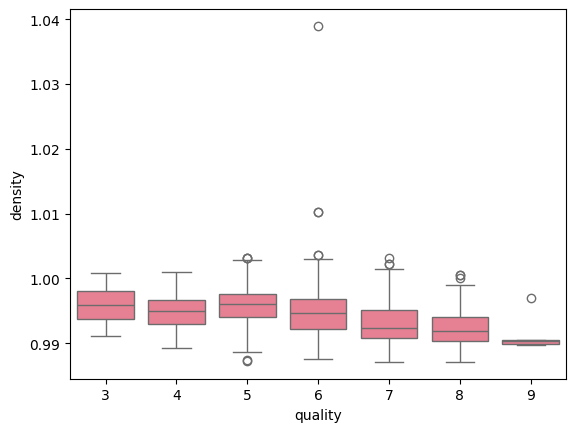

2023-11-13 23:24:12,631 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:12,640 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


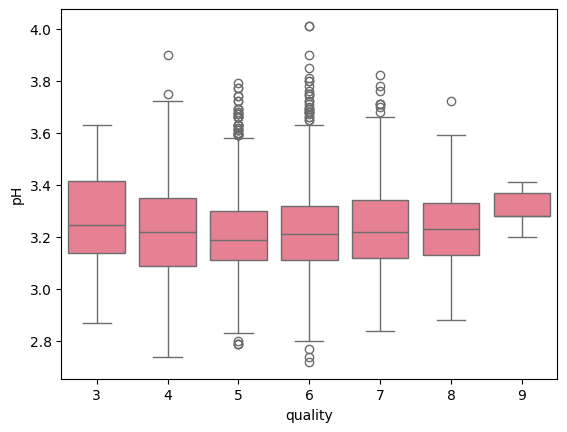

2023-11-13 23:24:12,793 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:12,802 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


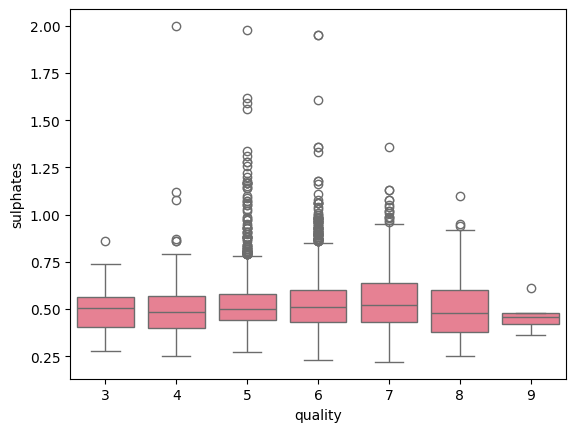

2023-11-13 23:24:12,960 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-13 23:24:12,969 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


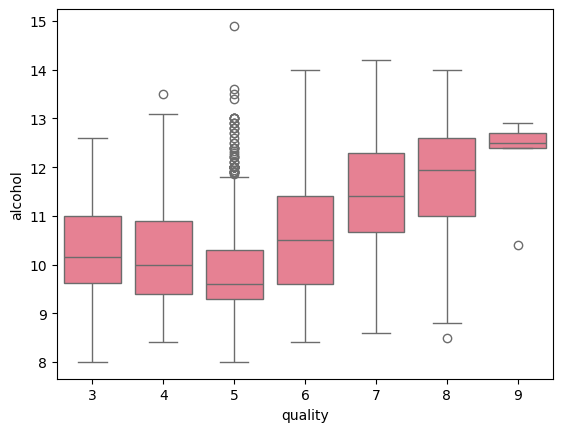

In [100]:
g = sns.boxplot(x='quality', y='type', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='fixed_acidity', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='volatile_acidity', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='citric_acid', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='residual_sugar', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='chlorides', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='free_sulfur_dioxide', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='total_sulfur_dioxide', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='density', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='pH', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='sulphates', data=wine_df)
plt.show()
g = sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.show()




### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [101]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=[
        "type", "fixed_acidity", "volatile_acidity",
        "citric_acid", "residual_sugar",
        "chlorides", "free_sulfur_dioxide",
        "total_sulfur_dioxide", "density",
        "pH", "sulphates", "alcohol",
    ],
    description="Wine quality dataset",
)
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/197787/fs/197706/fg/219473


Uploading Dataframe: 0.00% |          | Rows 0/6463 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/197787/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7fde5d671280>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent wine flower data from being written your your feature group if you write values outside the expected ranges.

In [102]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [103]:
suite = ExpectationSuite(expectation_suite_name="wine_quality")

expect(suite, "quality", 0, 10)
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/197787/fs/197706/fg/219473
